## Bibliotecas

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}' 

## Projeção e reprojeção

In [8]:
np.random.seed(2)
agrupamentos = 1
x,y = make_classification(n_features=3, n_redundant=0, n_informative=3,n_clusters_per_class=1, n_classes=1, n_samples=200)

#Transformação PCA
pca3 = PCA(n_components=3)
pca3.fit(x)
proj_x3 = pca3.transform(x)
invProj3 = pca3.inverse_transform(proj_x3)


#Transformação PCA
pca2 = PCA(n_components=2)
pca2.fit(x)
proj_x2 = pca2.transform(x)
invProj2 = pca2.inverse_transform(proj_x2)


print("pca3",proj_x3.shape)
print("pca2",proj_x2.shape)

print("pca3",invProj3.shape)
print("pca2",invProj2.shape)

print("explain. var.: ",pca3.explained_variance_)
print("explain. var.1: ",pca3.explained_variance_[0]/np.sum(pca3.explained_variance_))
print("explain. var. ratio: ",pca3.explained_variance_ratio_)

print("explain. var. ratio: ",np.cumsum(pca3.explained_variance_ratio_))

pca3 (200, 3)
pca2 (200, 2)
pca3 (200, 3)
pca2 (200, 3)
explain. var.:  [2.36160718 0.19942642 0.07137064]
explain. var.1:  0.8971293781916101
explain. var. ratio:  [0.89712938 0.07575828 0.02711234]
explain. var. ratio:  [0.89712938 0.97288766 1.        ]


In [12]:
print((0.897 + 0.076)/(0.897 + 0.076 + 0.027))

0.973


## Visualização do processo 3D

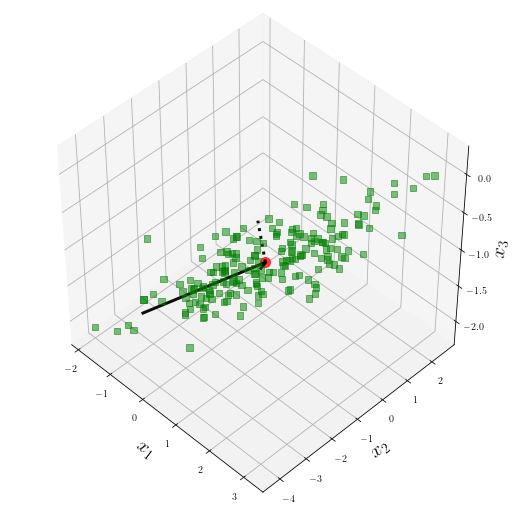

In [212]:
from mpl_toolkits.mplot3d import axes3d


path_out = '/home/rogerio/GIT/rp/blucher/figs/CapRDSA/Scatter3d_original.pdf'

FS = (7,7)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

#fig = plt.figure(figsize=FS)
#ax = fig.add_subplot(spec[0, 0])

#ax = fig.gca(projection='3d')
ax = fig.add_subplot(spec[0, 0] , projection='3d')
ax.w_xaxis.set_pane_color((0.95, 0.95, 0.95, 0.75))
ax.w_yaxis.set_pane_color((0.95, 0.95, 0.95, 0.75))
ax.w_zaxis.set_pane_color((0.95, 0.95, 0.95, 0.95))

ax.scatter(x[:, 0], x[:, 1], x[:, 2], marker='s', c='green', s=40, alpha=0.5)
ax.plot([pca3.mean_[0]], [pca3.mean_[1]], [pca3.mean_[2]], 'o', markersize=10, color='red', alpha=0.75)

#ax.plot([pca3.components_[0,0]], [pca3.components_[0,1]], [pca3.components_[0,2]], 'o', markersize=10, color='blue', alpha=0.5)
#ax.plot([pca3.components_[1,0]], [pca3.components_[1,1]], [pca3.components_[1,2]], 'o', markersize=10, color='orange', alpha=0.5)
#ax.plot([pca3.components_[2,0]], [pca3.components_[2,1]], [pca3.components_[2,2]], 'o', markersize=10, color='magenta', alpha=0.5)

LS = ['-','--',':']
countLS = 0
for length, vector in zip(pca3.explained_variance_, pca3.components_):
    v = vector * 2 * np.sqrt(length) 
    #v = vector
    #ax.plot([v[0]+pca3.mean_[0]],[v[1]+pca3.mean_[1]],[v[2]+pca3.mean_[2]], 'o', markersize=10, color='orange', alpha=0.75)
    ax.plot([pca3.mean_[0],v[0]+pca3.mean_[0]],[pca3.mean_[1],v[1]+pca3.mean_[1]],[pca3.mean_[2],v[2]+pca3.mean_[2]],color='black',linewidth=3,alpha=0.95,linestyle=LS[countLS])
    countLS = countLS+1
    
    
    
# Adjust the limits, ticks and view angle
#ax.set_zlim(0,0.1)
#ax.set_zticks(np.linspace(0,0.15,4))
ax.view_init(45, -45)

# titulos
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_3$', fontsize=20)

plt.savefig(path_out, dpi=300, bbox_inches='tight', format='pdf')
plt.show()

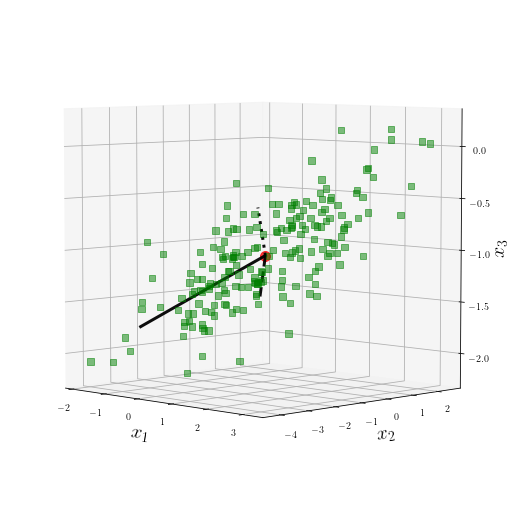

In [232]:
path_out = '/home/rogerio/GIT/rp/blucher/figs/CapRDSA/Scatter3d_original_view2.pdf'

FS = (7,7)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

#ax = fig.gca(projection='3d')
ax = fig.add_subplot(spec[0, 0] , projection='3d')
ax.w_xaxis.set_pane_color((0.95, 0.95, 0.95, 0.75))
ax.w_yaxis.set_pane_color((0.95, 0.95, 0.95, 0.75))
ax.w_zaxis.set_pane_color((0.95, 0.95, 0.95, 0.95))

ax.scatter(x[:, 0], x[:, 1], x[:, 2], marker='s', c='green', s=40, alpha=0.5)
ax.plot([pca3.mean_[0]], [pca3.mean_[1]], [pca3.mean_[2]], 'o', markersize=10, color='red', alpha=0.75)

LS = ['-','--',':']
countLS = 0
for length, vector in zip(pca3.explained_variance_, pca3.components_):
    v = vector * 2 * np.sqrt(length) 
    #v = vector
    #ax.plot([v[0]+pca3.mean_[0]],[v[1]+pca3.mean_[1]],[v[2]+pca3.mean_[2]], 'o', markersize=10, color='orange', alpha=0.75)
    ax.plot([pca3.mean_[0],v[0]+pca3.mean_[0]],[pca3.mean_[1],v[1]+pca3.mean_[1]],[pca3.mean_[2],v[2]+pca3.mean_[2]],color='black',linewidth=3,alpha=0.95,linestyle=LS[countLS])
    countLS = countLS+1
    
# Adjust the limits, ticks and view angle
#ax.set_zlim(0,0.1)
#ax.set_zticks(np.linspace(0,0.15,4))
ax.view_init(5, -45)

# titulos
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_3$', fontsize=20)

plt.savefig(path_out, dpi=300, bbox_inches='tight', format='pdf')
plt.show()

## Visualização 3d do PCA

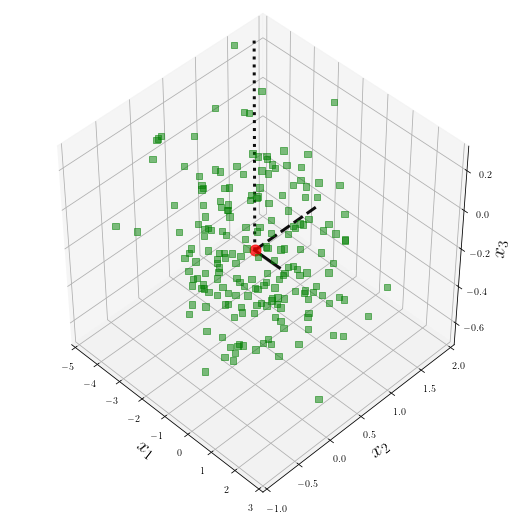

In [229]:
path_out = '/home/rogerio/GIT/rp/blucher/figs/CapRDSA/Scatter3d_projPCA3d.pdf'

FS = (7,7)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

#fig = plt.figure(figsize=FS)
#ax = fig.add_subplot(spec[0, 0])
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(spec[0, 0] , projection='3d')
ax.w_xaxis.set_pane_color((0.95, 0.95, 0.95, 0.75))
ax.w_yaxis.set_pane_color((0.95, 0.95, 0.95, 0.75))
ax.w_zaxis.set_pane_color((0.95, 0.95, 0.95, 0.95))

px = np.mean(proj_x3,axis=0)

ax.scatter(proj_x3[:, 0], proj_x3[:, 1], proj_x3[:, 2], marker='s', c='green', s=40, alpha=0.5)
ax.scatter(px[0],px[1],px[2], marker='o', c='red', s=120, alpha=0.75)

ax.plot([0,1],[0,0],[0,0],color='black',linewidth=3,alpha=0.95,linestyle='-')
ax.plot([0,0],[0,1],[0,0],color='black',linewidth=3,alpha=0.95,linestyle='--')
ax.plot([0,0],[0,0],[0,1],color='black',linewidth=3,alpha=0.95,linestyle=':')

# Adjust the limits, ticks and view angle
#ax.set_zlim(0,0.1)
#ax.set_zticks(np.linspace(0,0.15,4))
ax.view_init(45, -45)

ax.set_xlim(-5,3)
ax.set_ylim(-1,2)
ax.set_zlim(-0.7,0.3)

# titulos
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_3$', fontsize=20)

#ax.axes.get_xaxis().set_ticklabels([])
#ax.axes.get_yaxis().set_ticklabels([])
#ax.axes.get_zaxis().set_ticklabels([])

plt.savefig(path_out, dpi=300, bbox_inches='tight', format='pdf')

plt.show()

## Projeção das duas primeiras componentes

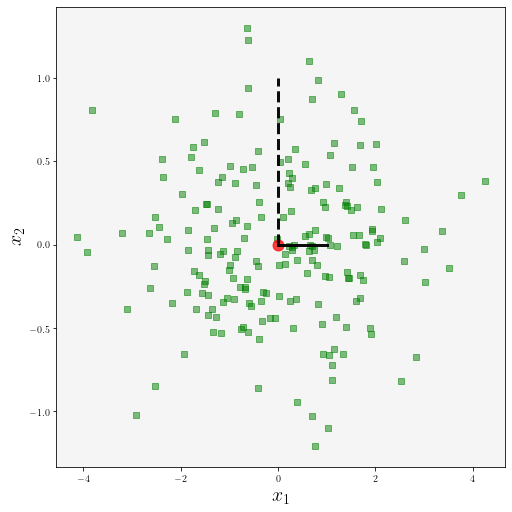

In [227]:
path_out = '/home/rogerio/GIT/rp/blucher/figs/CapRDSA/Scatter2d_projPCA2d.pdf'

FS = (7,7)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

#fig = plt.figure(figsize=FS)
ax = fig.add_subplot(spec[0, 0], facecolor='whitesmoke')

#ax = fig.gca(projection='3d')
#ax.w_xaxis.set_pane_color((0.95, 0.95, 0.95, 0.75))
#ax.w_yaxis.set_pane_color((0.95, 0.95, 0.95, 0.75))
#ax.w_zaxis.set_pane_color((0.95, 0.95, 0.95, 0.95))

#ax = fig.add_subplot(spec[0, 0] , projection='3d')
#ax.scatter(proj_x[:, 0], proj_x[:, 1], proj_x[:, 2], marker='o', c='blue', s=40, alpha=0.5)
ax.scatter(proj_x2[:, 0], proj_x2[:, 1], marker='s', c='green', s=40, alpha=0.5)

ax.plot([0,1],[0,0],color='black',linewidth=3,alpha=0.95,linestyle='-')
ax.plot([0,0],[0,1],color='black',linewidth=3,alpha=0.95,linestyle='--')

px = np.mean(proj_x2,axis=0)
ax.scatter(px[0],px[1], marker='o', c='red', s=120, alpha=0.75)

# Adjust the limits, ticks and view angle
#ax.set_zlim(0,0.1)
#ax.set_zticks(np.linspace(0,0.15,4))
#ax.view_init(45, -45)

# titulos
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
#ax.set_zlabel('$x_3$', fontsize=20)

#ax.axes.get_xaxis().set_ticklabels([])
#ax.axes.get_yaxis().set_ticklabels([])
#ax.axes.get_zaxis().set_ticklabels([])

#ax.set_aspect('equal')

plt.savefig(path_out, dpi=300, bbox_inches='tight', format='pdf')

plt.show()

## Visualização dos dados reprojetados em 2d

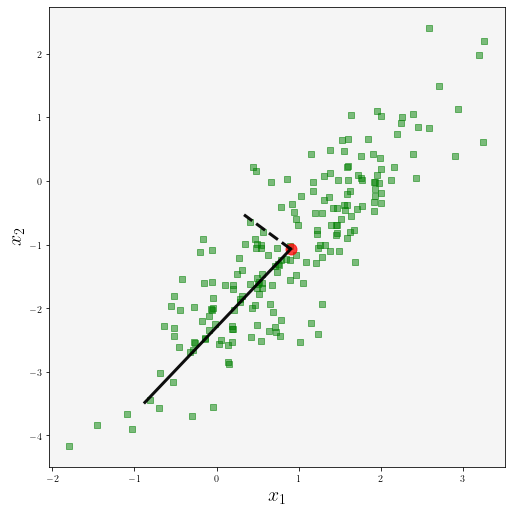

In [228]:
path_out = '/home/rogerio/GIT/rp/blucher/figs/CapRDSA/Scatter2d_reprojPCA2d.pdf'

FS = (7,7)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

#fig = plt.figure(figsize=FS)
ax = fig.add_subplot(spec[0, 0], facecolor='whitesmoke')

#ax = fig.gca(projection='3d')
#ax.w_xaxis.set_pane_color((0.95, 0.95, 0.95, 0.75))
#ax.w_yaxis.set_pane_color((0.95, 0.95, 0.95, 0.75))
#ax.w_zaxis.set_pane_color((0.95, 0.95, 0.95, 0.95))


#ax = fig.add_subplot(spec[0, 0] , projection='3d')
#ax.scatter(proj_x[:, 0], proj_x[:, 1], proj_x[:, 2], marker='o', c='blue', s=40, alpha=0.5)
ax.scatter(invProj2[:, 0], invProj2[:, 1], marker='s', c='green', s=40, alpha=0.5)

LS = ['-','--',':']
countLS = 0
for length, vector in zip(pca2.explained_variance_, pca2.components_):
    v = vector * 2 * np.sqrt(length)
    #v = vector
    #ax.plot([v[0]+pca3.mean_[0]],[v[1]+pca3.mean_[1]],[v[2]+pca3.mean_[2]], 'o', markersize=10, color='orange', alpha=0.75)
    ax.plot([pca2.mean_[0],v[0]+pca2.mean_[0]],[pca2.mean_[1],v[1]+pca2.mean_[1]],color='black',linewidth=3,alpha=0.95,linestyle=LS[countLS])
    countLS = countLS+1

px = np.mean(invProj2,axis=0)
ax.scatter(px[0],px[1], marker='o', c='red', s=120, alpha=0.75)

# Adjust the limits, ticks and view angle
#ax.set_zlim(0,0.1)
#ax.set_zticks(np.linspace(0,0.15,4))
#ax.view_init(45, -45)

# titulos
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
#ax.set_zlabel('$x_3$', fontsize=20)

#ax.axes.get_xaxis().set_ticklabels([])
#ax.axes.get_yaxis().set_ticklabels([])
#ax.axes.get_zaxis().set_ticklabels([])

plt.savefig(path_out, dpi=300, bbox_inches='tight', format='pdf')

plt.show()

In [ ]:


















FS = (5,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

#Subgráfico: dado original
ax = fig.add_subplot(spec[0, 0] , projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], marker='o', c='blue', s=20)
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_3$', fontsize=20)
ax.set_title('Original',fontsize=20)



plt.savefig('projPCA.png',dpi=300)
plt.show()

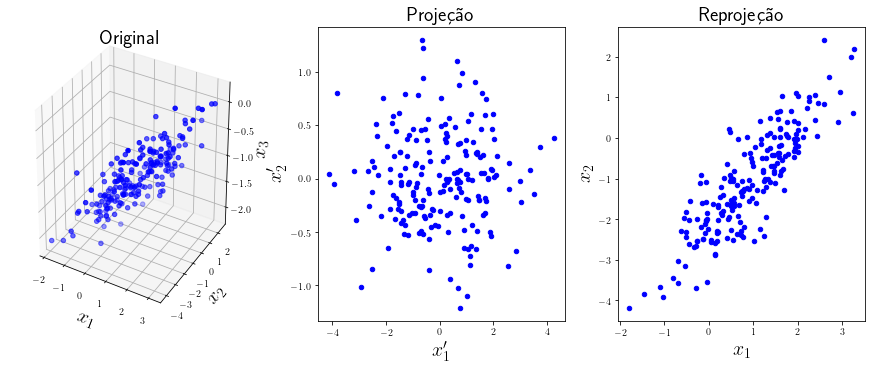

In [3]:
FS = (12,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)


#Subgráfico: dado original
ax = fig.add_subplot(spec[0, 0] , projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], marker='o', c='blue', s=20)
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_3$', fontsize=20)
ax.set_title('Original',fontsize=20)

#Subgráfico: dados projetados (eixos ortogonais)
ax = fig.add_subplot(spec[0, 1] )
ax.scatter(proj_x[:, 0], proj_x[:, 1], marker='o', c='blue', s=20)
ax.set_xlabel('$x_1^\prime$', fontsize=20)
ax.set_ylabel('$x_2^\prime$', fontsize=20)
ax.set_title('Projeção',fontsize=20)

#Subgráfico: dados reprojetados (espaço original)
ax = fig.add_subplot(spec[0, 2] )
ax.scatter(reproj_x[:, 0], reproj_x[:, 1], marker='o', c='blue', s=20)
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_title('Reprojeção',fontsize=20)

plt.savefig('projPCA.png',dpi=300)
plt.show()

In [ ]:
print('Vetor médio: ', pca.mean_)
print('Eixos/componentes: ',pca.components_)
print('Autovalores: ',pca.explained_variance_)

In [ ]:
from mpl_toolkits.mplot3d import axes3d


path_out = '/home/rogerio/GIT/rp/blucher/figs/CapRDSA/Scatter3d_original.pdf'

FS = (7,7)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

#fig = plt.figure(figsize=FS)
#ax = fig.add_subplot(spec[0, 0])

#ax = fig.gca(projection='3d')
ax = fig.add_subplot(spec[0, 0] , projection='3d')
ax.w_xaxis.set_pane_color((0.95, 0.95, 0.95, 0.75))
ax.w_yaxis.set_pane_color((0.95, 0.95, 0.95, 0.75))
ax.w_zaxis.set_pane_color((0.95, 0.95, 0.95, 0.95))

ax.scatter(x[:, 0], x[:, 1], x[:, 2], marker='s', c='green', s=40, alpha=0.5)
ax.plot([pca3.mean_[0]], [pca3.mean_[1]], [pca3.mean_[2]], 'o', markersize=10, color='red', alpha=0.5)

#ax.plot([pca3.components_[0,0]], [pca3.components_[0,1]], [pca3.components_[0,2]], 'o', markersize=10, color='blue', alpha=0.5)
#ax.plot([pca3.components_[1,0]], [pca3.components_[1,1]], [pca3.components_[1,2]], 'o', markersize=10, color='orange', alpha=0.5)
#ax.plot([pca3.components_[2,0]], [pca3.components_[2,1]], [pca3.components_[2,2]], 'o', markersize=10, color='magenta', alpha=0.5)

#ax.plot([pca3.components_[:,0]], 'o', markersize=10, color='blue', alpha=0.5)

for length, vector in zip(pca3.explained_variance_, pca3.components_):
    v = vector * 2 * np.sqrt(length) 
    #v = vector 
    
    print('vector: ', v)
    print('vector*length: ', v*np.sqrt(length) )
    print('length: ', np.sqrt(length) )
    
    #ax.arrow3D(pca3.mean_[0],pca3.mean_[1],pca3.mean_[2],
    #           v[0]+pca3.mean_[0],v[1]+pca3.mean_[1],v[2]+pca3.mean_[2],
    #           mutation_scale=10,  ec ='red',   fc='red')
    ax.plot([v[0]+pca3.mean_[0]],[v[1]+pca3.mean_[1]],[v[2]+pca3.mean_[2]], 'o', markersize=10, color='orange', alpha=0.5)
    #a = Arrow3D([pca3.mean_[0],v[0]+pca3.mean_[0]], [pca3.mean_[1],v[1]+pca3.mean_[1]], [pca3.mean_[2],v[2]+pca3.mean_[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    #a = Arrow3D(pca3.mean_[0],v[0]+pca3.mean_[0], pca3.mean_[1],v[1]+pca3.mean_[1], pca3.mean_[2],v[2]+pca3.mean_[2], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    # a = Arrow3D(pca3.mean_[0],v[0], pca3.mean_[1],v[1], pca3.mean_[2],v[2], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    #a = Arrow3D([pca3.mean_[0],v[0]], [pca3.mean_[1],v[1]], [pca3.mean_[2],v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    # ax.add_artist(a)
    #draw_vector(pca.mean_, pca.mean_ + v, ax=ax)
    #ax.quiver(pca3.mean_[0],v[0]+pca3.mean_[0], pca3.mean_[1],v[1]+pca3.mean_[1], pca3.mean_[2],v[2]+pca3.mean_[2], length = 2.5, normalize = True)
    #ax.quiver(pca3.mean_[0],v[0], pca3.mean_[1],v[1], pca3.mean_[2],v[2])#, length = 2.5, normalize = True)
    ax.plot([pca3.mean_[0],v[0]+pca3.mean_[0]],[pca3.mean_[1],v[1]+pca3.mean_[1]],[pca3.mean_[2],v[2]+pca3.mean_[2]],color='black',linewidth=2)
    
    
    
# Adjust the limits, ticks and view angle
#ax.set_zlim(0,0.1)
#ax.set_zticks(np.linspace(0,0.15,4))
ax.view_init(45, -45)

# titulos
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_3$', fontsize=20)

#ax.axes.get_xaxis().set_ticklabels([])
#ax.axes.get_yaxis().set_ticklabels([])
#ax.axes.get_zaxis().set_ticklabels([])

#plt.savefig(path_out, dpi=300, bbox_inches='tight', format='pdf')

#plt.draw()
plt.show()

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
    
    
#from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

#import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
#from mpl_toolkits.mplot3d.axes3d import Axes3D

#class Arrow3D(FancyArrowPatch):
#    def __init__(self, xs, ys, zs, *args, **kwargs):
#        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
#        self._verts3d = xs, ys, zs

class Arrow3D(FancyArrowPatch):
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._xyz = (x,y,z)
        self._dxdydz = (dx,dy,dz)

    def draw(self, renderer):
        x1,y1,z1 = self._xyz
        dx,dy,dz = self._dxdydz
        x2,y2,z2 = (x1+dx,y1+dy,z1+dz)

        xs, ys, zs = proj_transform((x1,x2),(y1,y2),(z1,z2), renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        super().draw(renderer)


def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''
    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)
setattr(Axes3D,'arrow3D',_arrow3D)   

In [ ]:
for length, vector in zip(pca3.explained_variance_, pca3.components_):
    print(length,vector)
    

#Eixos...
for length, vector in zip(pca3.explained_variance_, pca3.components_):
    v = vector * 2 * np.sqrt(length)
    #draw_vector(pca3.mean_, pca3.mean_ + v, ax=ax)
    print('v ',v)

print('')
    
print('vec: ',pca3.mean_[0], v[0]+pca3.mean_[0])
print('vec: ',pca3.mean_[1], v[1]+pca3.mean_[1])
print('vec: ',pca3.mean_[2], v[2]+pca3.mean_[2])
    
print('')
    
print(pca3.components_[0,:])
print(pca3.components_[1,:])
print(pca3.components_[2,:])
    
#for length, vector in zip(pca3.explained_variance_, pca3.components_):
#    v = vector * 2 * np.sqrt(length)
#    print('vec: ',pca3.mean_[0], v[0]+pca3.mean_[0])
#    print('vec: ',pca3.mean_[1], v[1]+pca3.mean_[1])
#    print('vec: ',pca3.mean_[2], v[2]+pca3.mean_[2])


print([pca3.mean_[0],v[0]], [pca3.mean_[1],v[1]], [pca3.mean_[2],v[2]])

print('media: ',np.mean(x,axis=0))
print(pca3.mean_)